# Business Analytics und Künstliche Intelligenz
Wintersemester 2023/2024

Prof. Dr. Jürgen Bock

## Grundlagen Künstliche Neuronale Netze

Künstliche Neuronale Netze sind den natürlichen neuronalen Netzen nachempfunden, wie sie in allen höheren Lebenwesen mit ausgebildetem Nervensystem vorkommen. Die Tatsache, dass Lebewesen mit neuronalen Netzen in der Lage sind ein mehr oder weniger intelligentes Verhalten zu zeigen lässt die Vermutung entstehen, dass sich durch künstliche neuronale Netze bestimmte Aspekte der Künstlichen Intelligenz realisieren lassen.

### Lernziele
* Sie sind in der Lage das Prinzip von künstlichen Neuronen zu erklären und die Bedeutung und Anforderungen an Aktivierungsfunktionen darzustellen
* Sie können verschiedene Netzwerkstrukturen nennen und sind in der Lage den *forward pass* für ein gegebenes Feed-Forward Neuronales Netz zu berechnen.
* Sie können das Grundprinzip beim Lernen von neuronalen Netzen erklären, und den grundlegenden Lernalgorithmus, die Bedeutung der einzelnen Phasen, sowie die Rolle des Batch-basierten Lernens skizzieren.
* Sie können verschiedene *loss function*s nennen und kennen deren typische Anwendungsgebiete.
* Sie können den grundlegenden Ablauf zum Machine Learning mit neuronalen Netzen in Python mittels *PyTorch* darstellen.
* Sie sind in der Lage, die Aufbereitung von Datensätzen, die Konfiguration von neuronalen Netzen, sowie den Lernalgorithmus mit allen notwendigen Bestandteilen in *PyTorch* anhand von gegebenem Python-Code zu interpretieren und zu erklären.

### Neuronen

Ein Neuron (Nervenzelle) ist der Grundbaustein eines (natürlichen) neuronalen Netzes. Ein Neuron ist eine Zelle und besteht aus einem Zellkörper mit Zellkern. Über die *Dendriten* - Verästelungen ausgehend vom Zellkörper - werden von anderen Neuronen über Synapsen Signale an das Neuron abgegeben. Wird durch die Stärke und Menge der Signale ein gewisser Schwellwert überschritten, wird ein Aktionspotential ausgelöst, das über das *Axon* weitergeleitet wird und sich über die Endknöpfchen auf weitere Neuronen überträgt.

<img src="neuron.png" width="800">

Ein Neuron lässt sich künstlich nachmodellieren und als mathematische Funktion ausdrücken. Ein solches künstliches Neuron besteht aus einer Menge von Eingängen, Gewichtungen für die Eingänge, einer Aktivierungsfunktion und einem Ausgang.

Betrachten wir das Neuron $j$. Die Aktivierung $a_j$, d.h. der Ausgang des Neurons, ist das Ergebnis einer Aktivierungsfunktion $g$ der gewichteten Eingänge $a_i$ des Neurons. Die Gewichte $w_{i,j}$ bezeichnen dabei jeweils das Gewicht des Eingangs $a_i$ am Neuron $j$.

<img src="artificial_neuron.png" width="600">

Das Neuron besitzt einen besonderen Eingang $a_0 = 1$ der Bias genannt wird. Da der Bias immer 1 ist, ist sein Beitrag zur Aktivierung des Neurons ausschließlich durch das Gewicht $w_{0,j}$ bestimmt. Der Bias garantiert, dass das Neuron stets eine lernbare Komponente besitzt, die nicht von einem Eingang abhängig ist.

Mathematisch lässt sich ein künstliches Neuron entsprechend wie folgt darstellen:

$$ a_j = g(\sum_{i=0}^n a_i w_{i,j}) $$

wobei $a_0 = 1$.

Die Eingänge werden mit $a$ bezeichnet, da diese im allgemeinen Fall wiederum Aktivierungen von vorhergehenden Neuronen sind. Im speziellen Fall dass es sich um ein "Eingangsneuron" handelt, entsprechen diese Aktivierungen den Eingangsvariablen des neuronalen Netzes, d.h. $a_i = x_i$.

#### Aktivierungsfunktionen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xdata = np.arange(-5, 5, 0.01)

Als Aktivierungsfunktion $g$ sind verschiedene Funktionen denkbar.

$$
threshold(x) = \left\{
\begin{array}\\
    1 & \mbox{if } x \geq 0 \\
    0 & \mbox{else}
\end{array} \right.
$$

In [2]:
def threshold(x):
    if x >= 0:
        return 1
    else:
        return 0

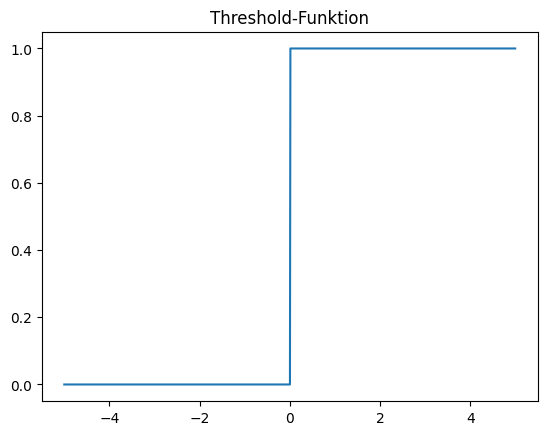

In [3]:
g = threshold
plt.plot(xdata, np.vectorize(g)(xdata))
plt.title("Threshold-Funktion")
plt.show()

$$sigmoid(x) = \frac{1}{1 + e^{-x}}$$

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

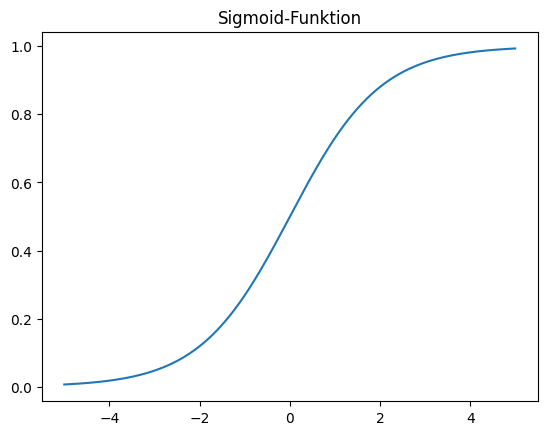

In [5]:
g = sigmoid
plt.plot(xdata, np.vectorize(g)(xdata))
plt.title("Sigmoid-Funktion")
plt.show()

Der Vorteil der *sigmoid* Funktion ist, dass diese stetig differenzierbar ist.

Beide Aktivierungsfunktionen sind *nichtlinear*. Auf diese Weise ist es überhaupt möglich, dass Neuronen und neuronale Netze in der Lage sind nichtlineare Funktionen zu approximieren.

### Netzwerkstrukturen

1. Feed-forward neural networks
 * Neuronen sind nur in eine Richtung miteinander verbunden, d.h. es gibt keine "Rückverbindungen" oder Schleifen. Das Netzwerk ist somit ein *gerichteter azyklischer Graph*.
 * Das Netzwerk repräsentiert eine Funktion welche einen Eingangsvektor auf einen Ausgangsvektor abbildet.
 * Das Netzwerk hat keine internen Zustände (abgesehen von den Gewichten, welche aber nicht von den Eingängen abhängig sind - wir sprechen hier noch nicht vom Lernprozess!)
2. Recurrent neural networks
 * Neuronen können derart miteinander verbunden sein, dass ihre Ausgänge als ihre eigenen Eingänge benutzt werden.
 * Das Netzwerk ist somit von den Aktivierungen einzelner Neuronen aus vorherigen Eingängen abhängig.
 * Das Netzwerk kann dementsprechend interne Zustände speichern (Kurzzeitgedächtnis)

Wir konzentrieren uns hier auf feed-forward Netzwerke.

Neuronale Netze sind typischerweise in Schichten (Layers) gegliedert. Bei einem feed-forward Netzwerk wird die Aktivierung ausgehend vom Eingangsvektor (Eingangsschicht, *input layer*) schichtweise durch das Netzwerk propagiert, bis die Aktivierung an der letzten Schicht (Ausgangsschicht, *output layer*) angekommen ist. Die Aktivierung der letzten Schicht ist entsprechend die Ausgabe (oder das Berechnungsergebnis) des neuronalen Netzwerks.

In einem einschichtigen (single-layer) neuronalen Netz gibt es eine Schicht von Neuronen, die die Eingänge direkt auf die Ausgänge abbilden. In diesem Fall ist jedes Gewicht nur für einen einzigen Ausgang verantwortlich. (Diese Eigenschaft macht das Lernen der Gewichte vergleichsweise einfach.)

In einem mehrschichtigen (multi-layer) neuronalen Netz (auch Multi-Layer-Perceptron (MLP) genannt), liegen eine oder mehrere Schichten zwischen Eingängen und Ausgängen. Diese Schichten werden als *hidden layers* bezeichnet. In diesem Fall sind Gewichte der vorderen Schichten für mehrere Ausgänge verantwortlich.

Das folgende Beispiel beschreibt ein dreischichtiges neuronales Netz mit einer *input layer*, einer *hidden layer*, und einer *output layer*.

<img src="simple_mlp.png" width="600">

Die *input layer* entspricht dem Eingangsvektor $\vec{x} = (x_1, x_2, x_3)$. Die *hidden layer* besteht aus den beiden Neuronen 4 und 5. Die *output layer* besteht aus dem einzelnen Neuron 6, da das neuronale Netz einen einzelnen Ausgangswert berechnet. (Im Falle von mehr als einem Ausgangsneuron berechnet das neuronale Netz einen Ausgangsvektor $\vec{y} = (y_1, \ldots, y_m)$. Würde man obiges neuronales Netz ohne die Ausgangsschicht bestehend aus Neuron 6 betrachten, hätten wir ein single-layer Netzwerk mit einem Ausgangsvektor $\vec{y} = (a_1, a_2)$.)

Wenn wir davon ausgehen, dass die Aktivierungsfunktion $g$ in jedem Neuron gleich ist, würde sich die Berechnung von $y$ in obigem Netzwerk wie folgt darstellen:

\begin{eqnarray}
y & = & g(w_{0,6} + w_{4,6}a_4 + w_{5,6}a_5) \\
  & = & g(w_{0,6} + w_{4,6}g(w_{0,4} + w_{1,4}x_1 + w_{2,4}x_2 + w_{3,4}x_3) + w_{5,6}g(w_{0,5} + w_{1,5}x_1 + w_{2,5}x_2 + w_{3,5}x_3))
\end{eqnarray}

#### Beispiel: Berechnung einfacher Bool'scher Operationen

Wir wollen versuchen einfache Bool'sche Funktionen mit neuronalen Netzen zu berechnen: AND, OR, XOR

Hier die entsprechenden Wahrheitstabellen:

| AND | 0 | 1 |      | OR | 0 | 1 |      | XOR | 0 | 1 |
|-----|---|---|      |----|---|---|      |-----|---|---|
| **0**   | 0 | 0 |  | **0**  | 0 | 1 |  | **0**   | 0 | 1 |
| **1**   | 0 | 1 |  | **1**  | 1 | 1 |  | **1**   | 1 | 0 |

Bestimmte Bool'sche Funktionen lassen sich mit einem einzigen künstlichen Neuron berechnen, z.B. AND und OR:

In [8]:
x1 = 0
x2 = 1

#w01, w11, w21 = -1.5, 1, 1  # AND
w01, w11, w21 = -0.5, 1, 1  # OR

y = threshold(w01 + w11*x1 + w21*x2)

print("{}, {} -> {}".format(x1, x2, y))

0, 1 -> 1


Zur Berechnung der XOR Funktion benötigen wir ein mehrschichtiges neuronales Netz, da die Klassen nicht linear separierbar sind.

In [9]:
x1 = 1
x2 = 1

w03, w13, w23 = -1, 1, 0
w04, w14, w24 = -2, 1, 1
w05, w15, w25 = -1, 0, 1

w06, w36, w46, w56 = -1, 1, -2, 1

y = threshold(w06 + 
              w36*threshold(w03 + w13*x1 + w23*x2) + 
              w46*threshold(w04 + w14*x1 + w24*x2) + 
              w56*threshold(w05 + w15*x1 + w25*x2))

print("{} XOR {} = {}".format(x1, x2, y))

1 XOR 1 = 0


<img src="mlp_xor.png" width="600">

### Lernen in mehrschichtigen neuronalen Netzen

Ein neuronales Netz zu trainieren bedeutet die Gewichte so zu bestimmen dass das Netz für einen gegebenen Eingabevektor $\vec{x}$ den richtigen (erwarteten) Ausgabevektor $\vec{y}$ berechnet. Das Netz "lernt" sozusagen eine Funktion $\vec{h}_W(\vec{x})$, welche parametriert ist mit den Gewichten $w \in W$.

Entsprechen der Vorgehensweise im überwachten Lernen (*supervised learning*) werden Trainingsdaten verwendet, für welche der Ergebnisvektor bekannt ist. Ein neuronales Netz kann dabei als Klassifikator oder als Regressor trainiert werden. Der Unterschied liegt lediglich in der Interpretation des Ausgangsvektors.

#### Loss Function

Das Anpassen der Gewichte beginnt mit der Bestimmung des Fehlers (*loss*) des neuronales Netzes. Der Fehler wird mit einer sogenannten *loss function* berechnet und beschreibt die Größe der Abweichung der Berechnung des Netzes von dem erwarteten Ergebnis. Die *loss function* wird hier allgemein definiert als $E(\vec{h}_W(\vec{x}), \vec{t})$, also als eine Funktion die den Fehler basierend auf dem Ergebnis des neuronalen Netzes mit Eingabe $\vec{x}$ und dem erwartete Zielvektor $\vec{t}$ berechnet.

Je nach Problemstellung bieten sich verschiedene *loss functions* an, z.B.
- *Mean-Squared-Error (MSE)* für Regressionsprobleme,
- *Cross Entropy Loss* für Multiclass Klassifikationsprobleme,
- *Binary Cross Entropy Loss* für binäre Klassifikationsprobleme,

oder jede beliebige andere ggf. selbst definierte Funktion welche die Abweichung im konkreten Anwendungsfall am besten beschreibt.

#### Backpropagation

Ziel beim Training von neuronalen Netzen ist es, die Gewichte so zu bestimmen, dass der Fehler (*loss*) minimal ist.
Zur Anpassung der Gewichte wird der Gradient der *loss function* bezüglich der einzelnen Gewichte berechnet. Dazu ist die Berechnung der partiellen Ableitungen $\frac{\partial E}{\partial w_{i,j}}$ der *loss function* $E$ nach jedem Gewicht $w_{i,j}$ erforderlich. Durch die Hintereinanderreihung der einzelnen Neuronen kommt es dabei zu einer wiederholte Anwendung der Kettenregel. Die hohe Vernetzung in neuronalen Netzen führt hier dazu, dass Ableitungen bestimmter Terme wiederholt und damit redundant berechnet werden müssen.

Der Backpropagation Algorithmus ist ein optimierter Ansatz zur Berechnung des Gradienten durch die Anwendung von dynamischer Programmierung. Der Algorithmus propagiert den ermittelten Fehler (*loss*) rückwärts durch die Schichten des neuronalen Netzes (von der Ausgangsschicht zur Eingangsschicht). Dabei wird der Gradient Schicht für Schicht berechnet und redundante Berechnungen werden vermieden.

Zur Veranschaulichung betrachten Sie folgende Darstellung. (Es handelt sich nicht um ein realistisches Beispiel aus einem neuronalen Netz, sondern dient lediglich der Veranschaulichung des Zusammenhangs zwischen Gewichten und *loss*.):

Angenommen im neuronalen Netz gibt es zwei Gewichte $w_1$ und $w_2$. Für einen gegebenen (und "festgehaltenen") Eingangsvektor $\vec{x} = (x_1, x_2)$ stellt sich der Fehler $loss = E(\vec{h}_{\{w_1,w_2\}}(\vec{x}), t)$ basierend auf $w_1$ und $w_2$ dar. (Hier eine zum Zwecke der Veranschaulichung eine beliebige Funktion.)

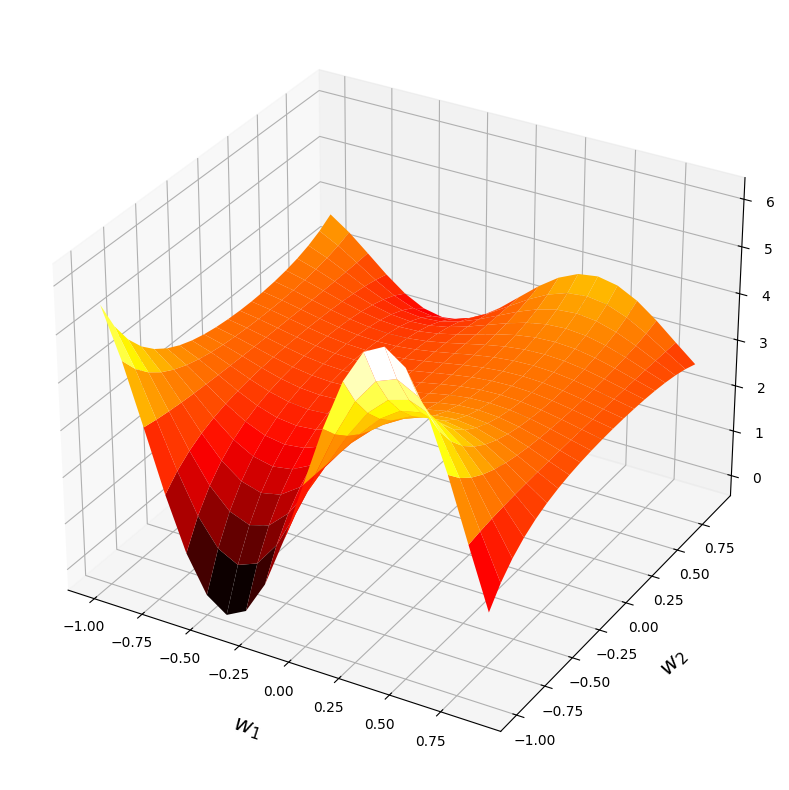

In [10]:
w1data, w2data = np.meshgrid(np.arange(-1, 1, 0.1), np.arange(-1, 1, 0.1))
z = 3 + ((np.sin(w1data*4) * np.cosh((w2data*3)-0.5))/5)
  
plt.figure(figsize =(15, 10)) 
axes = plt.axes(projection ='3d') 
axes.set_xlabel('$w_1$', fontsize=16, labelpad=15)
axes.set_ylabel('$w_2$', fontsize=16, labelpad=15)
axes.set_zlabel('loss', fontsize=16, labelpad=15)
axes.plot_surface(w1data, w2data, z, cmap=plt.get_cmap('hot'))
plt.show()

Gesucht sind also Gewichtswerte für die der *loss* minimal wird. Beachten Sie, dass diese Darstellung von einem konkreten Trainingssample (festgehaltene $x_1$ und $x_2$) ausgeht. Die Schwierigkeit liegt also in der Feststellung der besten Gewichtskonfiguration für **alle** Trainingssamples.

#### Änderung der Gewichte

Ist der Gradient berechnet ist für jedes Gewicht die Richtung bekannt, in die das Gewicht angepasst werden muss, um zu einer Minimierung des Fehlers zu gelangen. Dabei ist zu beachten, dass diese Richtung eine Anpassung hin zu einer lokalen Verbesserung beschreibt. Es besteht daher die Möglichkeit in einem lokalen Minimum zu landen, wenn das globale Minimum über einem "Berg" in der anderen Richtung, oder jenseits des lokalen Minimums liegt.

Um dem Problem zu entgegnen werden durchdachte Optimierungsalgorithmen angewendet. Ein wesentlicher Faktor dabei ist die *learning rate*. Diese ermöglicht den Grad der Gewichtsänderung, quasi die Schrittweite. Ein kleiner Wert ermöglicht ein möglichst genaues Finden des Minimums, verhindert aber das Ausbrechen aus einem lokalen Minimum. Ein großer Wert ermöglicht das Überspringen eines lokalen Minimums, neigt aber dazu, ständig über das globale Minimum hinüber zu springen und auf einer suboptimalen Lösung zu verharren.

#### Trainingsalgorithmus

Das Trainieren eines neuronalen Netzes bedeutet das Bestimmen der Gewichte derart, dass der Fehler (*loss*) über alle Trainingsdaten minimal ist.

Das Training erfolgt in *Epochen*, wobei eine Epoche einen Durchlauf aller Trainingssamples bestehend aus *forward pass*, *backward pass*, sowie Anpassung der Gewichte bedeutet.
- **forward pass**: Berechnung des Ausgangsvektors des neuronalen Netzes für einen gegebenen Eingangsvektor. (Ein Trainingssample)
- **backward pass**: Backpropagation des berechneten Fehlers zur Bestimmung des Gradienten im Gewichtsraum.

Da die Anpassung der Gewichte in kleinen Schritten erfolgt werden im Training mehrere Epochen durchlaufen.

Der generische **Trainingsalgorithmus** stellt sich entsprechend wie folgt dar:

---
1. Initialisierung der Gewichte $w \in W$ mit zufälligen Werten
2. Iteration über die Epochen
  - Iteration über die Trainingsbeispiele bestehend aus Featurevektor $\vec{x}$ und Zielvektor $\vec{t}$
    1. *forward pass*: Berechnung des Augangsvektors des neuronalen Netzes $\vec{y} = \vec{h}_W(\vec{x})$
    2. Berechnung des Fehlers $loss = E(\vec{y}, \vec{t})$
    3. *backward pass*: Berechnung des Gradienten im Gewichtsraum basierend auf $loss$, entsprechend für die einzelnen Gewichte $\frac{\partial E(\vec{y}, \vec{t})}{\partial w},\quad \forall w \in W$
    4. Anpassung der Gewichte durch einen Optimierungsalgorithmus basierend auf dem Gradienten
---

Die Iteration über die Trainingsamples wird typischerweise stapelweise durchgeführt. Konkret bedeutet dies, dass alle Trainingsamples eines Stapels (*batch*, auch *mini-batch*) durch das Netzwerk geführt werden (*forward pass*), bevor über alle Samples innerhalb des Stapels der Fehler (*loss*) berechnet wird und die Gradient-, bzw. Gewichtsanpassung erfolgt. Die Anpassung der Gewichte wird somit von allen Trainingssamples innerhalb eines *batches* gleichermaßen beeinflusst. (Idealerweise und entsprechend der verfügbaren Rechenkapazitäten erfolgt die Berechnung der Trainigssamples eines *batches* gleichzeitig, d.h. parallel.)

Die Hauptvorteile des *batch*-basierten Trainings sind:

- Geschwindigkeit, da parallele Berechnung möglich
- Bessere Generalisierung des neuronalen Netzes (d.h. Vermeidung von Overfitting), da Trainingssamples nicht einzeln, sondern gruppenweise zur Berechnung der Gewichte herangezogen werden

Zu große Stapelgrößen können allerdings dazu führen, dass das Netzwerk nicht mehr zur optimalen Konfiguration konvertiert. Entsprechend ist die Wahl der optimalen Stapelgröße ein wichtiger (Hyper-)Parameter.

Beim *batch*-basierten Training ändert sich der obige Algorithmus derart, dass die innere Schleife (Iteration über die Trainingsbeispiele) nicht über die einzelnen Beispiele, sondern über *batches* von Beispielen iteriert. Die Berechnung des *forward pass* und der *loss function* muss entsprechend stapelweise erfolgen.

## Künstliche Neuronale Netze mit *PyTorch*

*PyTorch* vereinfacht die Arbeit mit neuronalen Netzen und entlastet den Anwender in vielerlei Hinsicht. Viele der strukturellen und algorithmischen Details neuronaler Netze sind durch die *PyTorch* API weggekapselt, so dass der Anwender sich auf die Konfiguration der Hyperparameter konzentrieren kann.

In [11]:
import torch

Im Folgenden wollen wir einfache neuronale Netze mit *PyTorch* erstellen und trainieren. Dabei betrachten wir das Lernproblem der Klasifikation.

### Daten

Die *scikit-learn* Bibliothek bietet diverse Funktionen um künstliche Beispieldaten zu erzeugen, welche sich zum Testen von Klassifikatoren oder Regressoren verwenden lassen.

In [12]:
from sklearn import datasets

Die Generierung des Datensatzes lässt sich beliebig konfigurieren, um besondere Herausforderungen für den Klassifikator darzustellen. Hier erzeugen wir zur einfacheren Darstellung einen Datensatz mit zwei Merkmalen pro Datensample und eine Klassifierung in zwei linear separierbare Klassen. 

In [13]:
data_ls = datasets.make_classification(
    n_samples=10000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=2,
    flip_y=0,
    weights=[0.1,0.9],
    random_state=6 )

Der Datensatz besteht aus den Datenvektoren $X$ und dem Zielvektor $t$.

In [14]:
X, t = data_ls

In [15]:
print('Features X:')
print(X)
print('\nTarget t:')
print(t)

Features X:
[[0.41199288 3.84729515]
 [1.28011039 3.13407879]
 [0.27581969 3.35221464]
 ...
 [1.94322528 1.85706141]
 [1.52348322 2.756548  ]
 [1.94551292 1.71437855]]

Target t:
[1 1 1 ... 1 1 1]


Scatter-Plot des Datensatzes:

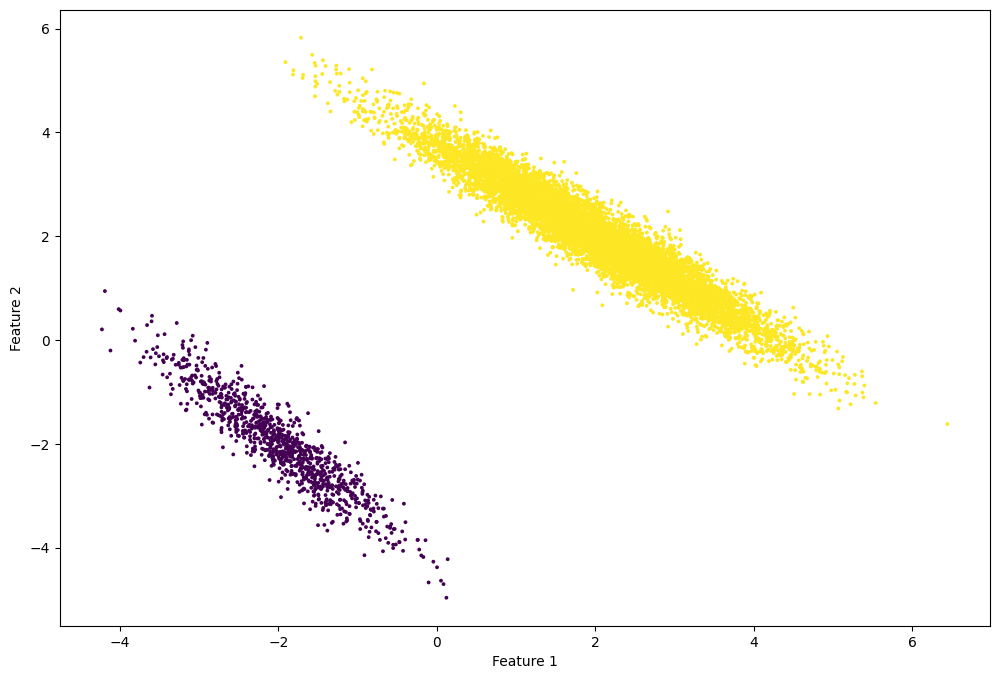

In [16]:
plt.figure(figsize = (12, 8))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(X[:,0], X[:,1], c=t, s=3)
plt.show()

Um den Datensatz in *PyTorch* verwenden zu können müssen wir ihn in ein *PyTorch*-kompatibles Format umwandeln. In diesem Fall wäre das ein allgemeines ``TensorDataset``.

In [17]:
from torch.utils.data import TensorDataset

In [18]:
dataset = TensorDataset(torch.from_numpy(X), torch.from_numpy(t))

Der Zugriff auf die Daten erfolgt über einen `DataLoader` der im *PyTorch*-Paket `torch.utils.data` bereitgestellt wird.

In [19]:
from torch.utils.data import DataLoader

Der `DataLoader` liefert Daten aus dem Datensatz zur weiteren Verarbeitung. Dabei können die Daten stapelweise geliefert werden. `batch_size` gibt die Größe dieser Stapel an. Mit dem Parameter `shuffle=True` weisen wir den ``DataLoader`` an, die Datensamples in zufälliger Reihenfolge zurückzuliefern.

In [20]:
data_loader = DataLoader(dataset=dataset, batch_size=10, shuffle=True)

Werfen wir einen Blick in die *batches* wie sie vom ``DataLoader`` geliefert werden.

In [21]:
for batch in data_loader:
    input, target = batch
    print(input)
    print(target)

tensor([[-3.2105, -0.0972],
        [ 2.1352,  1.6049],
        [ 2.2279,  2.3354],
        [ 2.9917,  1.2698],
        [-1.0786,  4.1981],
        [ 1.7704,  2.2077],
        [-3.1862, -0.3770],
        [ 3.2101,  1.1813],
        [ 3.8305,  0.2608],
        [ 1.9027,  1.6105]], dtype=torch.float64)
tensor([0, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=torch.int32)
tensor([[ 2.6488,  1.5009],
        [-0.4172,  4.0973],
        [ 1.4626,  2.6340],
        [ 2.5201,  1.5693],
        [ 2.1950,  1.8056],
        [ 0.6126,  2.7530],
        [ 2.7323,  1.3532],
        [ 1.9832,  1.8227],
        [ 0.9719,  3.0846],
        [ 1.8498,  1.8249]], dtype=torch.float64)
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=torch.int32)
tensor([[ 1.9171,  2.4332],
        [ 2.2453,  1.9089],
        [ 2.3542,  1.8276],
        [ 1.2194,  2.9217],
        [-0.6153,  3.9437],
        [ 2.4274,  1.8664],
        [ 0.0844,  3.9261],
        [ 0.7172,  3.2519],
        [ 0.7285,  2.6640],
        [ 0.9084,  2.8978]],

### Ein Neuron

Da die Klassen in diesem ersten Beispiel linear separierbar sind, lässt sich ein Klassifikator durch ein einzelnes Neuron realisieren.

Da *PyTorch* auf die Spezifikation vielschichtiger neuronaler Netze ausgelegt ist, ist die Definition eines einzelnen Neurons etwas umständlicher als vielleicht nötig. Konkret betrachten wir es als neuronales Netz mit einer Schicht, welche zwei Eingangsvariablen auf eine Ausgangsvariable abbildet. (Ein einschichtiges Netzwerk mit genau einem Ausgang ist immer ein einzelnes Neuron.)

Neuronale Netze werden *PyTorch* als Python-Klassen implementiert, die von der in *PyTorch* definierten Klasse ``nn.Module`` erben. Dabei wird eine Methode ``__init__`` als Klassenkonstruktor definiert, welcher die einzelnen Schichten definitert. Daneben wird eine Methode (Klassenfunktion) namens ``forward`` definiert, welche den *forward pass* implementiert, also die Eingabe des Eingangsvektors in die erste Schicht, und dann die Weiterreichung in die nächsten Schichten über die ebenfalls an dieser Stelle spezifizierten Aktivierungsfunktionen.

In diesem einfachen Fall verwenden wir eine einzige Schicht vom Typ ``nn.Linear``, d.h. eine *fully connected* Schicht, wie wir sie bisher ausschließlich betrachtet haben. Als Aktivierungsfunktion verwenden wir die *sigmoid* Funktion.

In [22]:
from torch import nn

In [23]:
class Neuron(nn.Module):
    def __init__(self):
        super(Neuron, self).__init__()   # Aufruf der Superklasse (nn.Module)
        self.neuron = nn.Linear(2, 1)    # Definition der einzigen Schicht innerhalb der Klasse namens "neuron"
                                         #   "self" bezieht sich auf die Klasse selbst und beschreibt, dass
                                         #   das Objekt "neuron" zu dieser Klasse gehört
        
    def forward(self, x):                # Die Übergabe des Parameters "self" erfolgt implizit,
                                         # es muss also nur der Eingabevektor x übergeben werden
        x = self.neuron(x)               # Durchreichen des Eingabevektors durch die erste Schicht ...
        x = torch.sigmoid(x)             # ... und durch die Aktivierungsfunktion
        return x

Nun kann die Klasse instanziiert werden:

In [24]:
model = Neuron()

Die Struktur des neuronalen Netzwerks kann nun angezeigt werden:

In [25]:
print(model)

Neuron(
  (neuron): Linear(in_features=2, out_features=1, bias=True)
)


Es lassen sich auch die Gewichte darstellen. Diese sind in der ``nn.Module`` Klasse als ``parameters`` bezeichnet.

In [26]:
parameters = list(model.parameters())
print('Eingangsgewichte der ersten Schicht:\n', parameters[0])

Eingangsgewichte der ersten Schicht:
 Parameter containing:
tensor([[0.2637, 0.5190]], requires_grad=True)


### Training des Modells

Zum Training des neuronalen Netzes folgen wir dem allgemeinen Trainingsalgorithmus wie oben beschrieben. Dazu interieren wir in einer äußeren Schleife über eine gewissen Anzahl von Epochen.

In [27]:
num_epochs = 20

Zur Berechnung des Fehlers benötigen wir eine *loss function*. Für eine Binärklassifikation, wie in diesem Beispiel, eignet sich die *Binary Cross Entropy Loss*. Sie wird, wie jede Menge weiterer *loss functions* von *PyTorch* bereitgestellt und ist dort als Klasse ``nn.BCELoss`` implementiert.

In [28]:
loss_fn = nn.BCELoss()

Des Weiteren benötigen wir einen Optimierer, der auf Basis des Gradienten die Anpassung der Gewichte im neuronalen Netz vornimmt. Ein Standardoptimierungsalgorithmus ist *Stochastic Gradient Descent*, welcher im PyTorch Modul ``optim`` als ``optim.SGD`` implementiert ist. Er benötigt Kenntniss über die zu optimierenden Gewichte und eine *learning rate* (`lr`).

In [29]:
from torch import optim

In [30]:
optimizer = optim.SGD(model.parameters(), lr=0.001)

Für jede Epoche iterieren wir stapelweise über die Trainingsdaten.

Um den Fortschritt visuell darstellen zu können benötigen wir ein Modul aus ``IPython``. Außerdem speichern wir den Verlauf des Fehlers in einer Liste.

In [31]:
from IPython import display
loss_history = []
plt.figure(figsize = (12,8));

<Figure size 1200x800 with 0 Axes>

Die *batches* werden vom ``DataLoader`` geliefert. Das zurückgelieferte *batch* Objekt lässt sich in Input und Target (d.h. Klassenlabel) unterteilen.

Vor jeder Neuberechnung des Gradienten muss der zuvor berechnete Gradient zurückgesetzt werden, sonst kommt es zu einer ungewollten Aufsummierung.

Der Eingangsvektor wird nun zunächst im *forward pass* durch das neuronale Netz propagiert. Aus dem berechneten Ausgangsvektor und dem erwarteten Zielvektor berechnet die *loss function* den Fehler. Ausgehend von dem Fehler (*loss*) wird der *backward pass* angestoßen um den Gradienten zu berechnen. *PyTorch* speichert den Gradienten und seine Komponenten direkt in den Datenstrukturen (den ``parameters``) des neuronalen Netzes, so dass der Optimierer direkt darauf operieren kann.

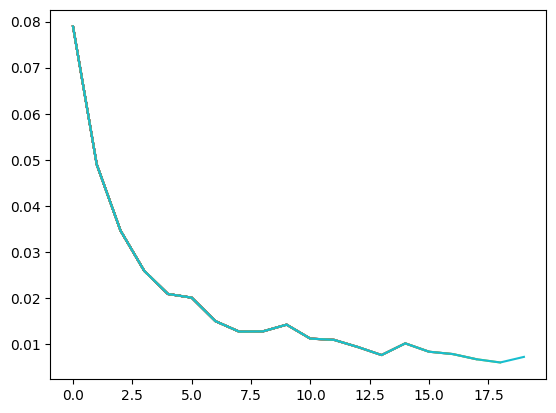

Epoch 19, loss: 0.007205565460026264


None

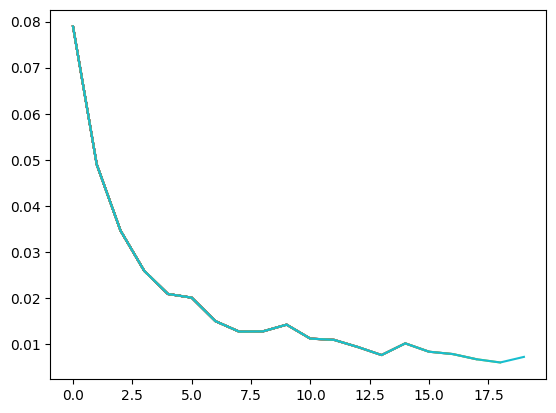

In [32]:
for epoch in range(num_epochs):
    for batch in data_loader :
        optimizer.zero_grad()
        input, target = batch
        output = model(input.float())
        loss = loss_fn(output, torch.unsqueeze(target.float(), 1))
        loss.backward()
        optimizer.step()
    
    ## Zu Visualisierungszwecken:
    loss_history.append(loss.item())
    plt.plot(loss_history)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    display.display(print("Epoch {:2}, loss: {}".format(epoch, loss.item())))

Eine interessante Darstellung ist die visualisierung der *decision boundary*. Hierzu steht eine Funktion im mitgelieferten Modul ``dataview`` bereit.

In [33]:
import dataview

Die *decision boundary* zeigt die Klassengrenze, welche das neuronale Netz gelernt hat. Bei einem einzelnen Neuron ist dies immer eine lineare Funktion (bei einem zweidimensionalen Eingangsvektor also eine Gerade).

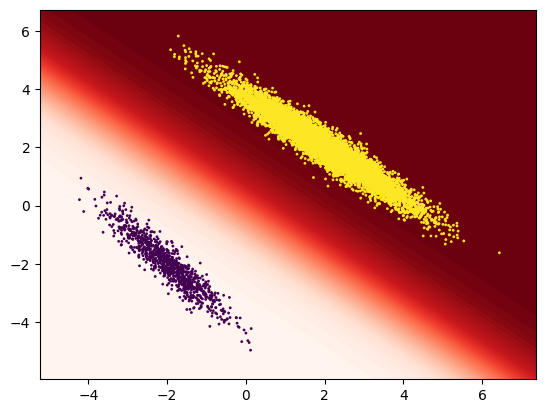

In [34]:
dataview.plot_decision_boundary2d(model, X, t)

### Mehrschichtige Netze

In analoger Weise wie das einzelne Neuron mittels *PyTorch* definiert und trainiert wurde lassen sich auch mehrschichtige, mitunter sehr komplexe neuronale Netzstrukturen darstellen.

#### Daten

Auch für diesen Fall benutzen wir zunächst einen synthetischen Datensatz generiert durch *scikit-learn*. Wieder soll es ein Datensatz mit zwei Merkmalen und zwei Zielklassen sein.

In [35]:
data_moons = datasets.make_moons(
    n_samples = 10000,
    noise = 0.2 )

Wir teilen die Daten wieder in Merkmalsvektoren und Zielvektor.

In [36]:
X, t = data_moons

Und können die Daten wieder in gleicher Weise plotten.

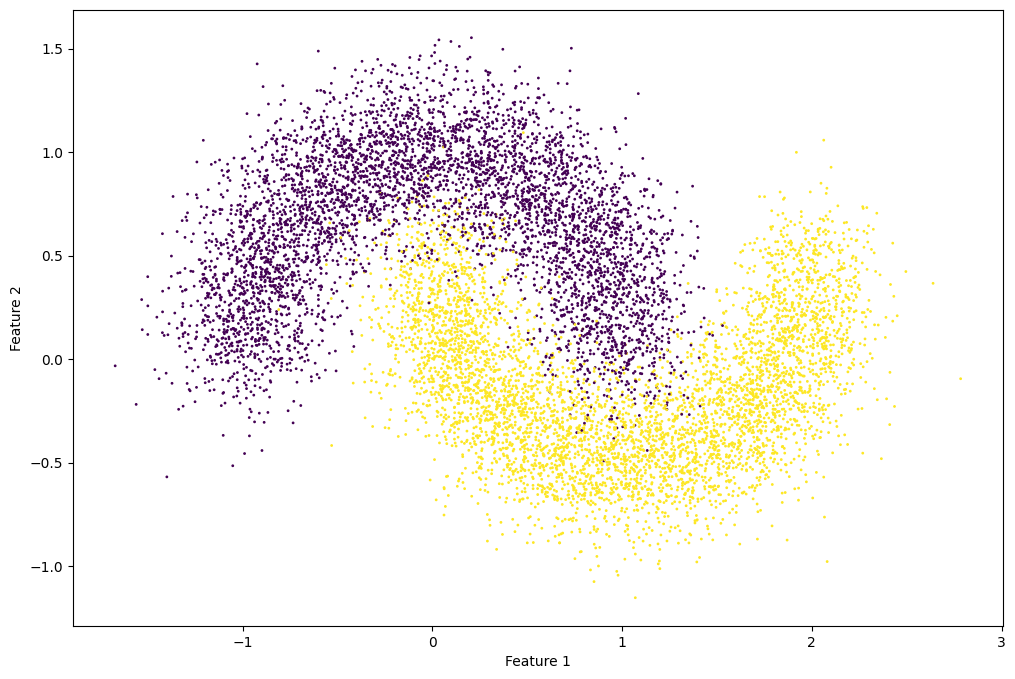

In [37]:
plt.figure(figsize = (12, 8))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(X[:,0], X[:,1], c=t, s=1)
plt.show()

Hier wird deutlich, dass die Klassen in diesem Datensatz nicht linear separierbar sind.

Wir benötigen noch ein entsprechendes ``TensorDataset`` und einen ``DataLoader``.

In [38]:
dataset = TensorDataset(torch.from_numpy(X), torch.from_numpy(t))
data_loader = DataLoader(dataset=dataset, batch_size=20, shuffle=True)

#### Neuronales Netz

Wir definieren ein neuronales Netz mit drei vollständig miteinander vernetzten Schichten. (Ein Multi-Layer-Perceptron, MLP):

In [39]:
from torch.nn import functional as F

class MLP( nn.Module ):
    def __init__( self ):
        super( MLP, self ).__init__()
                                        
        self.fc1 = nn.Linear( 2, 20 )   # Eingangsschicht entspricht dem Eingangsvektor (hier: 2-dimensional) 
        self.fc2 = nn.Linear( 20, 10 )  # Hidden Layers: Anzahl der Eingänge 
        self.fc3 = nn.Linear( 10, 5 )   #   muss Anzahl der Ausgänge
        self.fc4 = nn.Linear( 5, 1 )    #   der vorherigen Schicht entsprechen
        
    def forward( self, x ):
        x = torch.sigmoid( self.fc1( x ) )
        x = torch.sigmoid( self.fc2( x ) )
        x = torch.sigmoid( self.fc3( x ) )
        x = torch.sigmoid( self.fc4( x ) )
        return x

In [40]:
model = MLP()

Die *loss function* kann wie im vorherigen Beispiel verwendet werden. Wir benutzen jedoch einen etwas besseren Optimierer: *Adam*. Der Optimierer muss mit jeder Änderung von ``model`` neu initalisiert werden.

In [41]:
optimizer = optim.Adam(model.parameters(), lr=0.0005)

Die Trainingsschleife ist unverändert wie im vorherigen Beispiel mit nur einem Neuron implementiert. (Zur Verdeutlichung hier nochmal angegeben, tatsächlich würde man diese Trainingsschleife in eine Funktion auslagern.)

Zunächst aber nochmal Zurücksetzen der Visualisierungs-Hilfskonstrukte:

In [42]:
loss_history = []
plt.figure(figsize = (12,8));

<Figure size 1200x800 with 0 Axes>

Hier benötigen wir etwas mehr Epochen.

In [43]:
num_epochs = 50

Dann die Trainingsschleife:

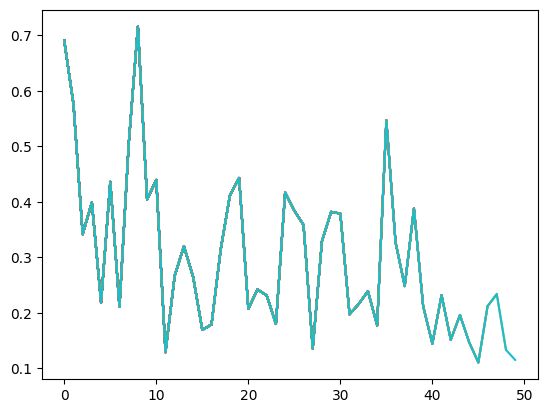

Epoch 49, loss: 0.11499480158090591


None

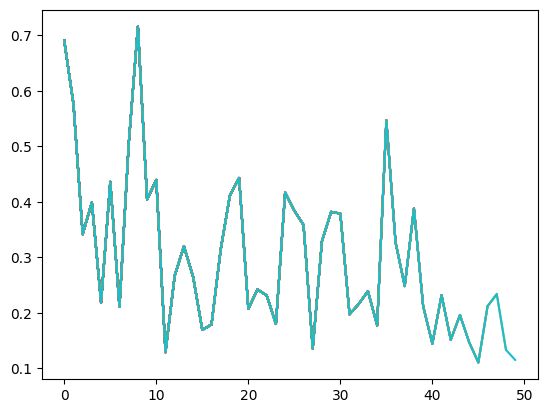

In [44]:
for epoch in range(num_epochs):
    for batch in data_loader :
        optimizer.zero_grad()
        input, target = batch
        output = model(input.float())
        loss = loss_fn(output, torch.unsqueeze(target.float(), 1))
        loss.backward()
        optimizer.step()
    
    ## Zu Visualisierungszwecken:
    loss_history.append(loss.item())
    plt.plot(loss_history)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    display.display(print("Epoch {:2}, loss: {}".format(epoch, loss.item())))

Die *decision boundary* sieht wie folgt aus:

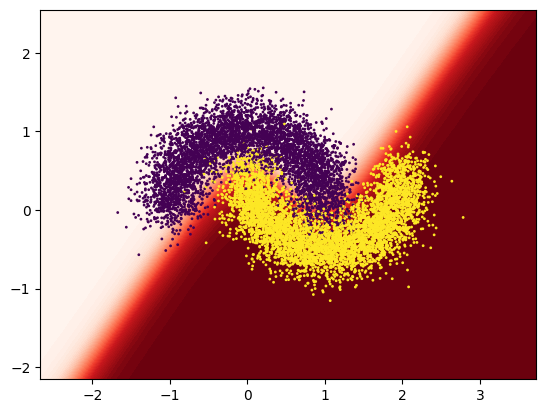

In [45]:
dataview.plot_decision_boundary2d(model, X, t, showData=True)